<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Decision Tree on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Data Preparation for Model Training](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section402)<br>
    - 4.3 [Applications of Logistic Regression](#section402)<br>
    - 4.4 [Preparing X and y using pandas](#section403)<br>
    - 4.5 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.6 [Logistic regression in scikit-learn](#section406)<br>
    - 4.7 [Using the Model for Prediction](#section407)<br>
5. [Logistic Regression](#section5)<br>
    - 5.1 [Logisitic regression in scikit learn](#section501)<br>
    - 5.2 [Using the Model for Prediction](#section502)<br> 
    - 5.3 [Model evaluation for Logistic Regression](#section503)<br> 
    
6. [Decision Tree](#section6)<br>
    - 6.1 [Decision Tree in scikit learn](#section601)<br>
    - 6.2 [Using the Model for Prediction](#section602)<br> 
    - 6.3 [Model evaluation for Decision Tree](#section603)<br>
    
7. [Comparing Models](#section7)<br>
    - 7.1 [Decison Tree Vs Logisitic Regression](#section701)<br>
    
8. [Hyperparameter Optimization](#section8)<br>
    - 8.1 [Changing Hyperparameters Manually](#section801)<br>
    - 8.2 [Hyperparameter Optimization with Gridsearch](#section802)<br>

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()


/Users/neelmanigupta/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [4]:
#data = pd.read_csv('titanic_data.csv')

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
final_col = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [7]:
data = data[final_col]

In [8]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [10]:
# Finding the distribution of Embarked across unique values
data.groupby(['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [11]:
data.Embarked.mode()

0    S
dtype: object

In [12]:
# Finding the mode of Embarked
data['Embarked'].mode()[0]

'S'

In [13]:
# Filling Null values of Embarked with its mode
data.Embarked = data.Embarked.fillna(data['Embarked'].mode())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data.Age.fillna(data.Age.median(), inplace = True)
data.Fare.fillna(data.Fare.median(), inplace = True)

In [16]:
data.drop('Cabin', axis = 1,inplace = True)

In [17]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [18]:
# Creating a new feature/column : "Family Size". By adding the number of children and parents
data['FamilySize'] = data['SibSp'] + data['Parch']+1

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


- __Dropping__ columns __'Name' , 'Ticket'  , 'SibSp' , 'PassengerId' and 'Parch'__ 

In [20]:
drop_cols = ['Name','Ticket','SibSp','Parch','PassengerId']

In [21]:
data.drop(drop_cols, axis = 1, inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
5,0,3,male,28.0,8.4583,Q,1
6,0,1,male,54.0,51.8625,S,1
7,0,3,male,2.0,21.0750,S,5
8,1,3,female,27.0,11.1333,S,3
9,1,2,female,14.0,30.0708,C,2


## EDA

In [22]:
# how many people survived
data['Survived'].sum()

342

In [23]:
data.shape[0]

891

In [24]:
# % of people survived
data['Survived'].sum()/data.shape[0]

0.3838383838383838

In [25]:
# what is the distribution of male and female
data.groupby(['Sex'])['Sex'].count().sort_values(ascending=False)#.plot('bar')

Sex
male      577
female    314
Name: Sex, dtype: int64

In [26]:
# From where did the people embark
data.groupby(['Embarked'])['Embarked'].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# How many people stayed in each of the classes
data.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False)

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [29]:
data.groupby(['Embarked'])['Survived'].sum().sort_values(ascending=False)

Embarked
S    217
C     93
Q     30
Name: Survived, dtype: int64

In [30]:
data.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [31]:
data.FamilySize.sum()

1697

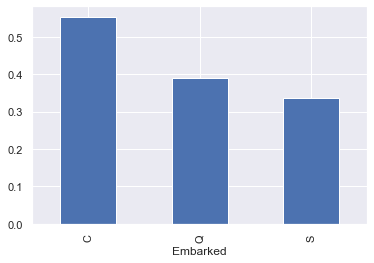

In [32]:
(data.groupby(['Embarked'])['Survived'].sum()/data.groupby(['Embarked'])['Survived'].count()).plot(kind ='bar')

In [33]:
data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

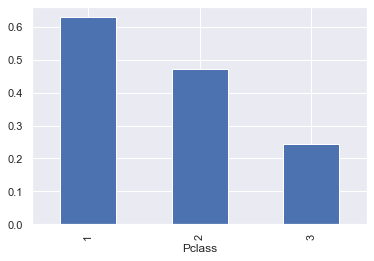

In [34]:
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()).plot(kind='bar')

In [35]:
data['Fare'].mean()

32.204207968574636

In [36]:
#data['combination'] = data['Embarked'].astype(str) + '-' + data['Pclass'].astype(str)

In [37]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [38]:
data.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [39]:
data.groupby(['Survived'])['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1.0, 'Pair Plot')

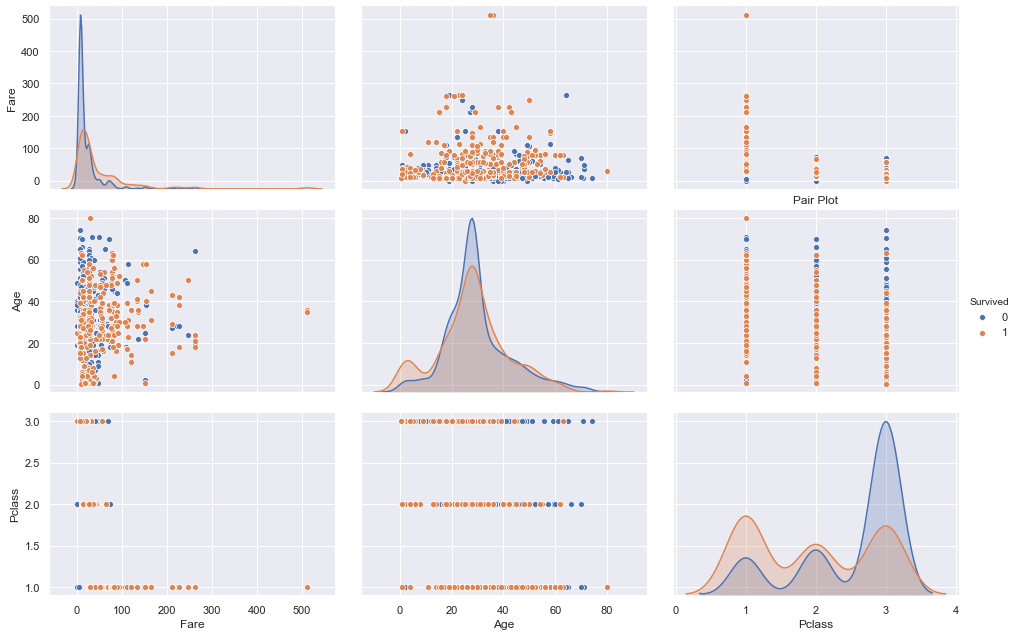

In [40]:
sns.pairplot(data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],\
                                                             hue="Survived", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

# Creating dummy variables for our categorical variables

In [41]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [42]:
cat_cols = ['Sex','Embarked']

In [43]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [44]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

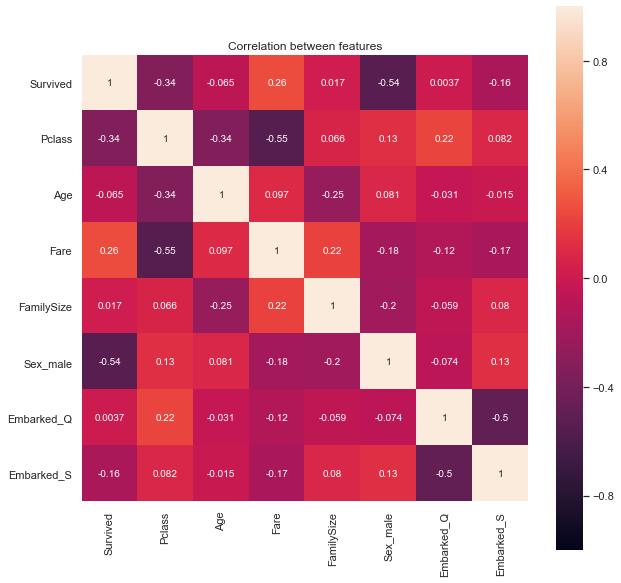

In [45]:
corr = data_with_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- __Fare and FamilySize__ are __positively coorelated with Survived.__

<a id=section4></a>

## 4. Data Preparation for Model Training

<a id=section401></a>

## 4.1 Preparing X and y using pandas

In [46]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


In [47]:
data_with_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [48]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male','Embarked_Q', 'Embarked_S']

target = ['Survived']

In [49]:
X = data_with_dummies[features]
y = data_with_dummies[target]

<a id=section405></a>

<a id=section402></a>

## 4.2 Splitting X and y into training and test datasets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [51]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (712, 7)
y_train shape:  (712, 1)

Test cases as below
X_test shape:  (179, 7)
y_test shape:  (179, 1)


<a id=section5></a>

## 5. LOGISTIC REGRESSION

<a id=section501></a>

## 5.1 Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

<a id=section502></a>

## 5.2 Using the Model for Prediction

In [53]:
y_pred_train_lr = logreg.predict(X_train)  

In [54]:
y_pred_test_lr = logreg.predict(X_test)                 # make predictions on the testing set

In [55]:
probabilities_lr = logreg.predict_proba(X_test)

In [56]:
probabilities_1 = probabilities_lr[:,1]
probabilities_0 = probabilities_lr[:,0]

<a id = section503></a>

## 5.3 Model evaluation for Logistic Regression

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### Model Evaluation using __accuracy classification score__

In [57]:
from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test,y_pred_test_lr)
print('Accuracy score for train data is:', accuracy_train_lr)
print('Accuracy score for test data is:', accuracy_test_lr)

Accuracy score for train data is: 0.800561797752809
Accuracy score for test data is: 0.7932960893854749


In [58]:
from sklearn.metrics import confusion_matrix
c_matrix_train_lr = pd.DataFrame(confusion_matrix(y_train, y_pred_train_lr))
c_matrix_train_lr.index = ['Actual Died','Actual Survived']
c_matrix_train_lr.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for LR for Train set\n",c_matrix_train_lr)

Confusion Matrix for LR for Train set
                  Predicted Died  Predicted Survived
Actual Died                 378                  65
Actual Survived              77                 192


This means 378 + 192 = __570 correct predictions__ & 77 + 65 = __142 false predictions__.

In [59]:
c_matrix_test_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_test_lr))
c_matrix_test_lr.index = ['Actual Died','Actual Survived']
c_matrix_test_lr.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for LR for test set\n",c_matrix_test_lr)

Confusion Matrix for LR for test set
                  Predicted Died  Predicted Survived
Actual Died                  89                  17
Actual Survived              20                  53


This means 89 + 53 = __142 correct predictions__ & 20 + 17 = __36 false predictions__.

<a id = section6></a>

## 6 Decision Tree

<a id = section601></a>

## 6.1 Decision Tree in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn import tree
    model = tree.DecisionTreeClassifier()
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

In [60]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

- __Plotting our model of decision tree__

In [61]:
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
export_graphviz(model_dt, 'tree.dot', feature_names = X_train.columns)

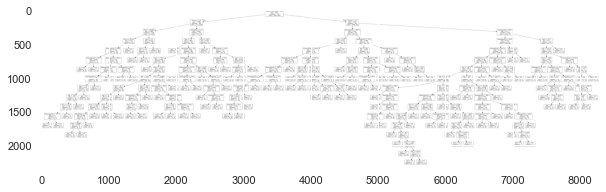

In [62]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)

<a id=section602></a>

## 6.2 Using the Model for Prediction

In [63]:
y_pred_train_dt = model_dt.predict(X_train) 
y_pred_test_dt = model_dt.predict(X_test)

- Now lets see some model evaluation techniques.

<a id = section603></a>

## 6.3 Model evaluation for Decision Tree

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### Model Evaluation using __accuracy_score__

In [64]:
#from sklearn.metrics import accuracy_score
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)
print('Accuracy score for train data for DT is:', accuracy_train_dt)
print('Accuracy score for test data for DT is:', accuracy_test_dt)

Accuracy score for train data for DT is: 0.9873595505617978
Accuracy score for test data for DT is: 0.7486033519553073


### Model Evaluation using confusion matrix

In [65]:
c_matrix_train_dt = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt))
c_matrix_train_dt.index = ['Actual Died','Actual Survived']
c_matrix_train_dt.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for DT for Train set\n",c_matrix_train_dt)

Confusion Matrix for DT for Train set
                  Predicted Died  Predicted Survived
Actual Died                 442                   1
Actual Survived               8                 261


This means 442 + 261 = __703 correct predictions__ & 8 + 1 = __9 false predictions__.

In [66]:
c_matrix_test_dt = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))
c_matrix_test_dt.index = ['Actual Died','Actual Survived']
c_matrix_test_dt.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for DT for test set\n",c_matrix_test_dt)

Confusion Matrix for DT for test set
                  Predicted Died  Predicted Survived
Actual Died                  87                  19
Actual Survived              26                  47


This means 87 + 47 = __134 correct predictions__ & 26 + 19 = __45 false predictions__.

<a id = section7></a>

## 7. Comparing Models

<a id = section701></a>

## 7.1 Decision Tree VS Logisitc Regressionin

In [67]:
# All Accuracy scores
print("Accuracy of LR on Train:", accuracy_train_lr)
print("Accuracy of LR on Test:", accuracy_test_lr)
print("\nAccuracy of DT on Train:", accuracy_train_dt)
print("Accuracy of DT on Test:", accuracy_test_dt)

Accuracy of LR on Train: 0.800561797752809
Accuracy of LR on Test: 0.7932960893854749

Accuracy of DT on Train: 0.9873595505617978
Accuracy of DT on Test: 0.7486033519553073


In [68]:
# All Confusion Matrix
print("Confusion Matrix for LR on Train Set:\n", c_matrix_train_lr,"\n")
print("Confusion Matrix for LR on Test Set:\n", c_matrix_test_lr,"\n\n\n")

print("Confusion Matrix for DT on Train Set:\n", c_matrix_train_dt)
print("Confusion Matrix for DT on Test Set:\n", c_matrix_test_dt)

Confusion Matrix for LR on Train Set:
                  Predicted Died  Predicted Survived
Actual Died                 378                  65
Actual Survived              77                 192 

Confusion Matrix for LR on Test Set:
                  Predicted Died  Predicted Survived
Actual Died                  89                  17
Actual Survived              20                  53 



Confusion Matrix for DT on Train Set:
                  Predicted Died  Predicted Survived
Actual Died                 442                   1
Actual Survived               8                 261
Confusion Matrix for DT on Test Set:
                  Predicted Died  Predicted Survived
Actual Died                  87                  19
Actual Survived              26                  47


<a id = section8></a>

## 8. Hyperparameter Optimization

<a id = section801></a>

### 8.1 Changing Hyperparameters Manually

In [69]:
from sklearn import tree
model_dt_new = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
model_dt_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=7,
                       presort=False, random_state=0)

In [70]:
y_pred_train_dt_new = model_dt_new.predict(X_train) 
y_pred_test_dt_new = model_dt_new.predict(X_test)

In [71]:
accuracy_train_dt_new = accuracy_score(y_train,y_pred_train_dt_new)
accuracy_test_dt_new = accuracy_score(y_test,y_pred_test_dt_new)
print('Accuracy score for train data is:', accuracy_train_dt_new)
print('Accuracy score for test data is:', accuracy_test_dt_new)

c_matrix_train_dt_new = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt_new))
c_matrix_train_dt_new.index = ['Actual Died','Actual Survived']
c_matrix_train_dt_new.columns = ['Predicted Died','Predicted Survived']
print("\n\nConfusion Matrix for DT for Train set\n",c_matrix_train_dt_new)


c_matrix_test_dt_new = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt_new))
c_matrix_test_dt_new.index = ['Actual Died','Actual Survived']
c_matrix_test_dt_new.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for DT for test set\n",c_matrix_test_dt_new)

Accuracy score for train data is: 0.851123595505618
Accuracy score for test data is: 0.776536312849162


Confusion Matrix for DT for Train set
                  Predicted Died  Predicted Survived
Actual Died                 425                  18
Actual Survived              88                 181
Confusion Matrix for DT for test set
                  Predicted Died  Predicted Survived
Actual Died                 101                   5
Actual Survived              35                  38


This means we have now 101 + 38 = __139 correct predictions__ & 35 + 5 = __40 false predictions__.

In [72]:
print("Confusion Matrix for DT on Train Set:\n", c_matrix_train_dt)
print("Confusion Matrix for DT on Test Set:\n", c_matrix_test_dt)

Confusion Matrix for DT on Train Set:
                  Predicted Died  Predicted Survived
Actual Died                 442                   1
Actual Survived               8                 261
Confusion Matrix for DT on Test Set:
                  Predicted Died  Predicted Survived
Actual Died                  87                  19
Actual Survived              26                  47


<a id = section802></a>

### 8.2 Hyperparameter Optimization with Gridsearch

<br/>
Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.
To know more about the different parameters in decision tree classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
model_dt_tuned = GridSearchCV(decision_tree_classifier,tree_para)

In [ ]:
2 * 59 * 3

In [74]:
model_dt_tuned

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

In [75]:
model_dt_tuned.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

In [76]:
model_dt_tuned.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': None}

In [77]:
model_dt_tuned.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

- Using the model for __prediction__

In [78]:
y_pred_test1 = model_dt_tuned.predict(X_test)
y_pred_train1 = model_dt_tuned.predict(X_train)

- __Model Evaluation__ using __accuracy_score__

In [79]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train1))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for train data is: 0.8441011235955056
Accuracy score for test data is: 0.8044692737430168


In [83]:
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_dt_new))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_dt_new))

print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train_lr))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test_lr))

Accuracy score for train data is: 0.851123595505618
Accuracy score for test data is: 0.776536312849162
Accuracy score for train data is: 0.800561797752809
Accuracy score for test data is: 0.7932960893854749


- __Model Evaluation__ using __confusion matrix__

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  95                  11
Actual Survived              24                  49


You can see 95 + 49 = __144 correct predictions__ & 24 + 11 = __35 false predictions__.

__Observations:__

- __With gridsearch__ *accuracy_score* __increased__ to __0.804__ and the __number of correct predictions increased to 144__ and number of false predictions __decreased__ to __35__. 

In [ ]:
print('Accuracy score for test data for DT is:', accuracy_test_dt)
print("Confusion Matrix for DT on Test Set:\n", c_matrix_test_dt)